In [8]:
class Person:
    def __init__(self, x, y, infected=False, virus_type=None, immune=False):
        self.x = x 
        self.y = y  
        self.infected = infected
        self.color = 'r'
        self.virus_type = virus_type  
        self.alive = True  
        self.immune = immune 
        self.days_infected = 0  
    
    def move(self, env):
        if not self.infected:
            dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
            new_x = self.x + random.randint(1, 6) * dx
            new_y = self.y + random.randint(1, 6) * dy
        else:
            dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
            new_x = self.x + random.randint(1, 2) * dx
            new_y = self.y + random.randint(1, 2) * dy
            
        # Update the person's position
        self.x = new_x
        self.y = new_y
    
    def infect(self, virus_type):
        self.infected = True
        self.virus_type = virus_type
        self.color = "blue"
    
    def recover(self):
        self.infected = False
        self.virus_type = None
        self.immune = True
        self.color = "red"
    
    def die(self):
        self.alive = False
    
    def update(self, virus):
        if self.infected:
            self.days_infected += 1
            if self.days_infected >= virus.get_recovery_time():
                self.recover()
            elif random.random() < virus.get_death_rate():
                self.die()
            else:
                virus.update(self)
    
    def is_immune(self):
        return self.immune
    
    def check_direct_contact(self, env, virus_type):
        adjacent_people = env.get_adjacent_people(self.x, self.y)
        for person in adjacent_people:
            if person.infected and not self.is_immune():
                self.infect(virus_type)
                break

In [12]:
virus = Virus(recovery_time=1000, death_rate=0.00, transmission_rate=1)

import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output

class Environment:
    '''
    An Environment class for simulating the spread of a virus among a population of people.
    '''

    def __init__(self, xsize=100, ysize=100, initial_infected=10, total_people = 100, infection_prob=0.1, recovery_time=14):
        self.xsize = xsize
        self.ysize = ysize
        self.environ = np.zeros((self.xsize,self.ysize,3))
        self.environ[:,:,0] = 0.8
        self.environ[:,:,1] = 0.8
        self.environ[:,:,2] = 0.8
        self.person_agents = []
        self.infected_agents = []
        self.infection_prob = infection_prob
        self.recovery_time = recovery_time

        # add initial infected people
        for i in range(initial_infected):
            person = Person(random.randint(1, self.xsize), random.randint(1, self.ysize), True, virus)
            self.person_agents.append(person)
            self.infected_agents.append(person)
        for i in range(total_people):
            person = Person(random.randint(1, self.xsize), random.randint(1, self.ysize), False)
            self.person_agents.append(person)
            
    def add_agent(self, agent):
        self.person_agents.append(agent)

    def remove_agent(self, agent):
        self.person_agents.remove(agent)
        if agent in self.infected_agents:
            self.infected_agents.remove(agent)

    def simulate(self, tot_time):
        for dt in range(tot_time):
            clear_output(wait=True)
            plt.figure(figsize=(6, 6))
            plt.imshow(self.environ)
            ax = plt.gca()

            temp_agents = []
            for agent in self.person_agents:
                agent.move(self)
                ax.scatter(agent.x, agent.y, c=agent.color)

                if agent.infected:
                    agent.days_infected += 1
                    agent.color = "blue"
                    if agent.days_infected >= self.recovery_time:
                        agent.recover()
                        agent.color = "red"
                        self.infected_agents.remove(agent)

                
                if agent.infected:
                    for other_agent in self.person_agents:
                        if not other_agent.infected and (abs(other_agent.x - agent.x) <= 1 and abs(other_agent.y - agent.y) <= 1):
                            if np.random.rand() < self.infection_prob:
                                other_agent.infect(agent.virus_type)
                                other_agent.color = "blue"
                                self.infected_agents.append(other_agent)

                
                temp_agents.append(agent)

            
            self.person_agents = temp_agents

           
            plt.xlim(0, self.xsize)
            plt.ylim(0, self.ysize)
            plt.show()
            time.sleep(0.01)


In [13]:
class Virus:
    def __init__(self, recovery_time, death_rate, transmission_rate):
        self.recovery_time = recovery_time  
        self.death_rate = death_rate  
        self.transmission_rate = transmission_rate  
    
    def get_recovery_time(self):
        return self.recovery_time
    
    def get_death_rate(self):
        return self.death_rate

    def update(self, person):
        # Implement virus-specific behavior for each timestep
        pass

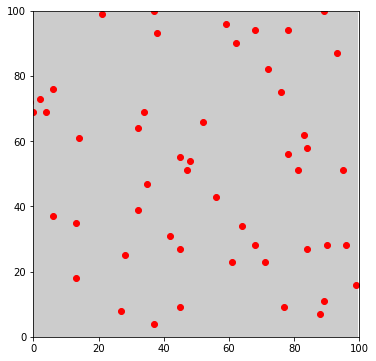

0


In [14]:
# Create an environment with 100x100 grid, 10 initial infected people, and infection probability of 0.1
env = Environment(xsize=100, ysize=100, initial_infected=20, infection_prob=0.2, total_people = 50)

# Create a virus with recovery time of 14 days, death rate of 0.05, and transmission rate of 0.1
virus = Virus(recovery_time=50, death_rate=0.01, transmission_rate=1)

# Simulate for 100 time steps
env.simulate(tot_time=50)
print(len(env.infected_agents))